<h2>Data Analytics- notebook</h2>

#### Motorcycle Sales Dataset 

This dataset shows information about **motorcycle sales**. It has **1061 rows**, and each row represents one motorcycle. There are **seven columns**:  

- **name**: Model of the motorcycle (e.g., *"Royal Enfield Classic 350"*).  
- **selling_price**: The price the motorcycle was sold for.  
- **year**: The year the motorcycle was manufactured.  
- **seller_type**: The type of seller (e.g., Individual).  
- **owner**: Ownership history (e.g., 1st owner, 2nd owner).  
- **km_driven**: Total kilometers the motorcycle has been used.  
- **ex_showroom_price**: Original price before extra costs (**many values are missing**).  

This dataset helps in understanding **used motorcycle prices and conditions**.




🔗 [**Motorcycle Sales Dataset on Kaggle**](https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset)

##### Data Format
- **File Type:** CSV *(Comma-Separated Values)*
- **Total Rows:** 1061
- **Total Columns:** 7

#### **Data Description, Features, and Limitations**    
This dataset contains information on **used motorcycle sales**, including their **price, age, ownership details, and driving history**. Each row represents a single motorcycle sale.  

#####  **Features**  

| Feature | Description |
|---------|-------------|
| **name** | The model name of the motorcycle. |
| **selling_price** | The final selling price of the motorcycle. |
| **year** | The manufacturing year of the motorcycle. |
| **seller_type** | The type of seller *(e.g., Individual, Dealer)*. |
| **owner** | Ownership history *(e.g., 1st owner, 2nd owner)*. |
| **km_driven** | The total kilometers the motorcycle has been driven. |
| **ex_showroom_price** | The original showroom price before taxes and extra costs. |

#####  **Limitations**  

- **Missing Values:** The **`ex_showroom_price`** column has **435 missing entries**.  
- **Duplicate Entries:** The dataset contains **6 duplicate rows**.  
- **No Additional Details:** Information on **motorcycle condition, maintenance history, or accident reports** is missing.  
- **Limited Time Context:** The dataset **lacks timestamps** for when each sale occurred, making **time-based analysis difficult**.  

 **Next Steps:** Consider handling missing values, removing duplicates, and enriching the dataset with additional features for better insights.


<h3><b>Code: importing modules, custom functions and loading the data</b></h3>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import RANSACRegressor

# Load the data 
df = pd.read_csv('motorcycle_sales.csv')

# Display summary statistics and general information about the data
print("Dataset preview:")
print(df.head())

print("Data Information:")
print(df.info())

print("Checking the shape of dataset:")
print(df.shape) 
    
    
print("Descriptive Statistics:")
print(df.describe())
    
print("Missing Values in Each Column:")
print(df.isnull().sum())

Dataset preview:
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   ob

<h3><b>Code: Data clean-up procedure</b></h3>

Use separate markdown cells if you wish to emphasize an important point or additional information for the reader (see vehicle example)

In [ ]:
# Drop missing values
df = df.dropna()

# Encoding the categorical variables
le = LabelEncoder()
df['seller_type'] = le.fit_transform(df["seller_type"])
df['owner'] = le.fit_transform(df["owner"])

data = df.copy()    
# Remove the 'name' column
df = df.drop(['name'], axis=1)

# After Encoding, I noticed that Owner type has 4 unique values and Seller type has 2 unique values
# Owner has:
# 0 = First Owner, 556
# 1 = Second Owner, 66
# 2 = Third Owner, 3
# 3 = Fourth & Above Owner, 1
# I will remove 2 and 3 as they are very few and will not have much impact on the model
df = df[df.owner != 2]
df = df[df.owner != 3]

# The Seller Type has 2 unique values:
# 0 = Individual, 619
# 1 = Dealer, 3
# I will remove 0 as it is very few and will not have much impact on the model
df = df[df.seller_type != 0]


# Since now seller type has only 1 unique value, I remove it.
df = df.drop(['seller_type'], axis=1)

# Check for  Redundancy in the data
vif_data = pd.DataFrame()
vif_data["Selling price"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data


#Use RANSAC (RANdom SAmple Consensus) to remove outliers
X = df.drop('selling_price', axis=1)
y = df['selling_price']
ransac = RANSACRegressor(residual_threshold=None, random_state=0)
ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outliers = df[~inlier_mask]
inliers = df[inlier_mask]

print(f"Inliers: {len(inliers)}")
print(f"Outliers: {len(outliers)}")
df = inliers

'\n# After Encoding the Owner and Seller Type, I noticed that Owner type has 4 unique values and Seller type has 2 unique values\n# Owner has:\n# 0 = First Owner, 556\n# 1 = Second Owner, 66\n# 2 = Third Owner, 3\n# 3 = Fourth & Above Owner, 1\n# I will remove 2 and 3 as they are very few and will not have much impact on the model\ndf = df[df.owner != 2]\ndf = df[df.owner != 3]\n\n# Seller Type has:\n# 0 = Individual, 619\n# 1 = Dealer, 3\n# I will remove 0 as it is very few and will not have much impact on the model\ndf = df[df.seller_type != 0]\n\n# Since now seller type has only 1 unique value, I will remove it as it will not have any impact on the model\ndf = df.drop([\'seller_type\'], axis=1)\n\n# Checking the Redundancy in the data\nvif_data = pd.DataFrame()\nvif_data["Selling price"] = df.columns\n\n# Calculating VIF for each feature\nvif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]\nvif_data\n\n\n# I will use the RANSAC algorithm to re

In [105]:
df.head()   

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,150000,2018,1,0,12000,148114.0
3,65000,2015,1,0,23000,89643.0
5,18000,2010,1,0,60000,53857.0
6,78500,2018,1,0,17000,87719.0
9,50000,2016,1,0,42000,60122.0


<h3><b>Code: Data analysis</b></h3>

Text(0.5, 1.0, 'Correlation Matrix')

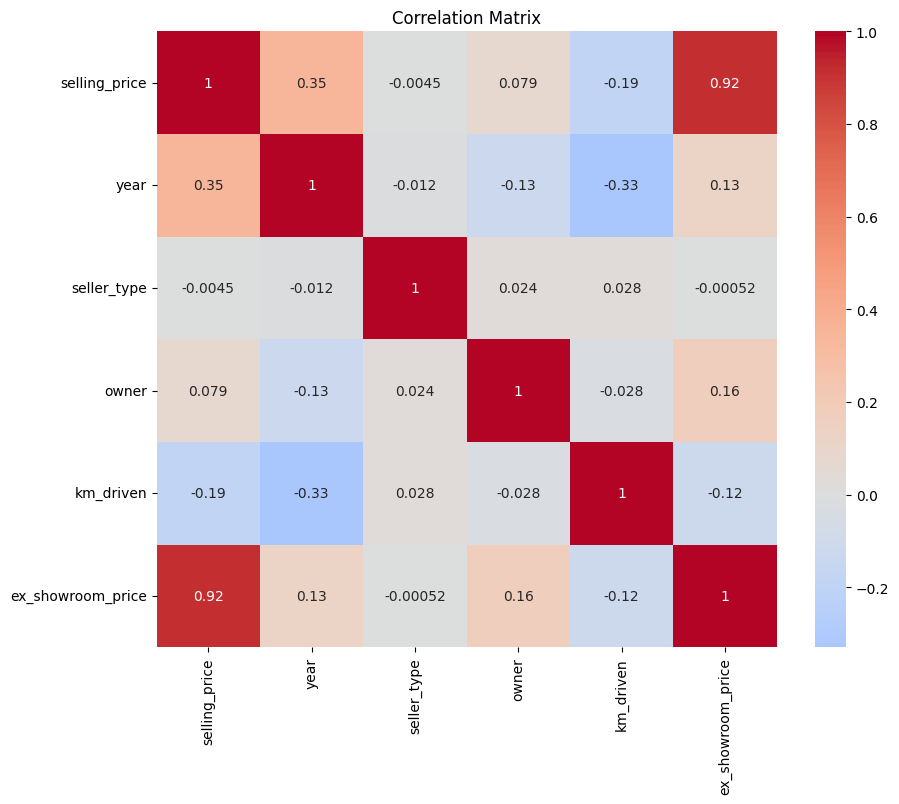

In [106]:
# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

<Axes: xlabel='km_driven', ylabel='selling_price'>

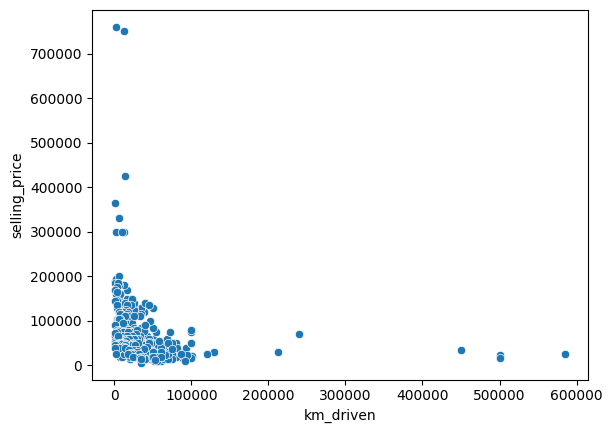

In [107]:
sns.scatterplot(df, x='km_driven', y='selling_price')

array([[<Axes: title={'center': 'selling_price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'seller_type'}>,
        <Axes: title={'center': 'owner'}>],
       [<Axes: title={'center': 'km_driven'}>,
        <Axes: title={'center': 'ex_showroom_price'}>]], dtype=object)

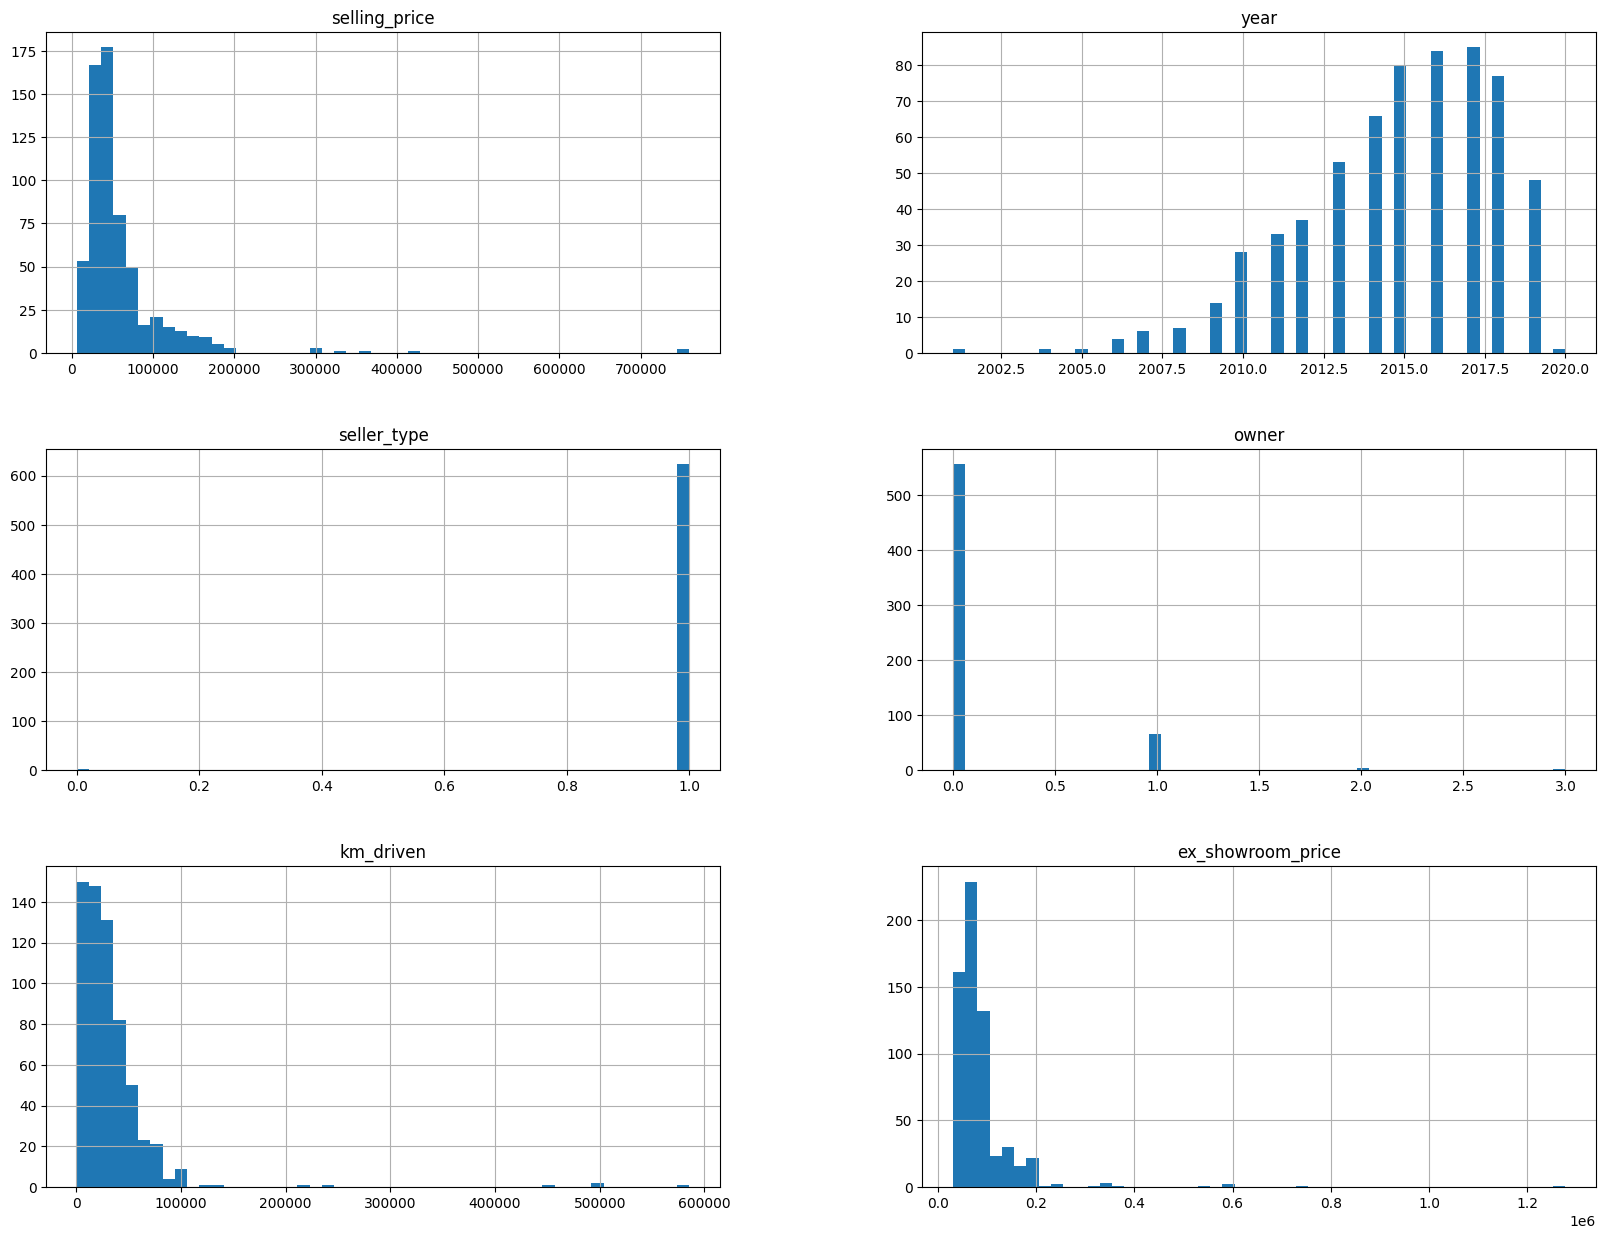

In [109]:
data.hist(bins=50, figsize=(20, 15))

<h3><b>Results and summary:</b></h3>

When I look at the correlation matrix, I see that **ex_showroom_price** has the strongest positive  to **selling_price**,<br> which makes me think that the original price is a main factor in deciding how much a motorcycle sells for.<br> I also notice that **year** has a moderate positive connection to **selling_price**, so it appears that newer bikes generally fetch higher prices.<br> At the same time, I saw a small negative connection between **km_driven** and **selling_price**, suggesting that motor witth higher mileage tend to sell for less.<br>
When I check the histograms, I see that most bikes are recent models, and many are first owner bikes with relatively low KM. This means  that good maintained,<br> newer motorcycles with higher ex-showroom prices are more likely to be sold at higher prices.


<h3><b>Ideas for further improvements:</b></h3>

After cleaning the data, I could use machine learning models to predict a motorcycle’s selling_price.

**To style text in a Markdown cell, I used an LLM.**